# **Imports** 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from scipy import stats
import math
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif



In [3]:
diab_df=pd.read_csv('/Users/vladandreichuk/Desktop/Comparative-Analysis-of-ML-Algorithms-Predicting-Hospital-Readmission-of-Diabetes-Patients/CP_Hospital_Readmission/diab_df_cleaned.csv')

In [4]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_inpatient          101766 non-null  int64 
 11  diag_1                    101766 non-null  object
 12  diag_2                    101766 non-null  object
 13  diag_3                    101766 non-null  object
 14  numb

## **Correlation Analysis**


In [5]:
# Select only the numeric columns from your DataFrame
numeric_columns = diab_df.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_columns.corr()

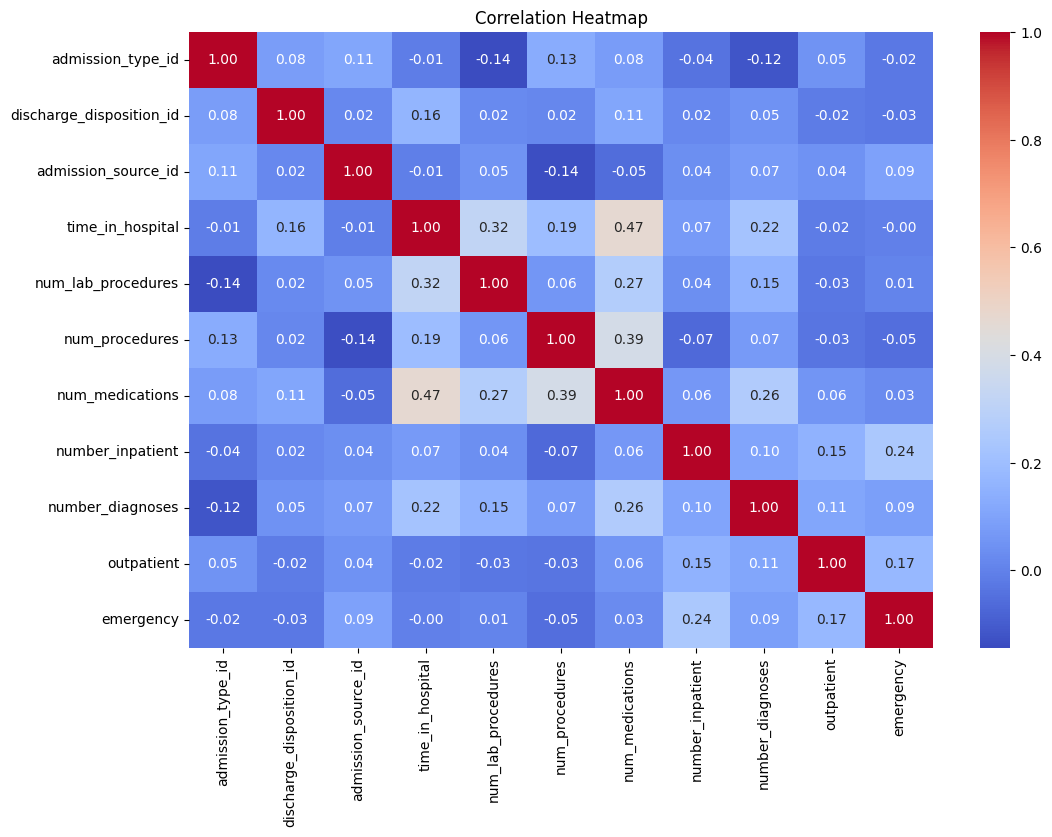

In [7]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## **Chi2 Analysis**

In [8]:
# Identify categorical columns
categorical_columns = diab_df.select_dtypes(include=['object']).columns
categorical_columns.drop('readmitted')

# Create an empty DataFrame to store chi-squared test results
chi_squared_results = pd.DataFrame(columns=['Categorical Column', 'Chi-squared Statistic', 'P-Value'])

# Create a list to store significant categorical columns
significant_categorical_columns = []

# Iterate through each categorical column
for column in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(diab_df[column], diab_df['readmitted'])

    # Perform the chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Append the results to the DataFrame
    chi_squared_results = chi_squared_results.append({'Categorical Column': column,
                                                      'Chi-squared Statistic': chi2,
                                                      'P-Value': p}, ignore_index=True)

    # Check if the p-value is below a significance threshold (e.g., 0.05)
    if p < 0.05:
        significant_categorical_columns.append(column)


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
chi_squared_results

,Categorical Column,Chi-squared Statistic,P-Value
0,race,81.935228,1.992203e-14
1,gender,37.461170,1.447272e-07
2,age,313.171753,9.348415e-56
3,admission_type_id,415.760978,6.037493e-80
4,discharge_disposition_id,3587.291304,0.000000e+00
5,admission_source_id,1150.971841,2.317985e-221
6,diag_1,4970.815982,0.000000e+00
7,diag_2,4014.559344,5.143196e-229
8,diag_3,3938.799576,5.906473e-202
9,max_glu_serum,51.922098,1.933304e-09


In [ ]:
cols_to_drop_chi = chi_squared_results[(chi_squared_results['P-Value']>=0.05) | (chi_squared_results['Chi-squared Statistic']<=25)]['Categorical Column'].tolist()
cols_to_drop_chi

['nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glyburide',
 'tolbutamide',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone']

In [ ]:
# Separate the target variable from the features
X = diab_df.drop(columns=['readmitted'])  # Features
y = diab_df['readmitted']  # Target variable

# Identify categorical columns by excluding numeric columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Perform one-hot encoding for all categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Calculate mutual information between features and the target variable
mutual_info = mutual_info_classif(X_encoded, y)

# Create a DataFrame to store the results
mutual_info_df = pd.DataFrame({'Feature': X_encoded.columns, 'Mutual_Info': mutual_info})

# Sort the DataFrame by mutual information values in descending order
mutual_info_df = mutual_info_df.sort_values(by='Mutual_Info', ascending=False)

# Now, 'mutual_info_df' contains the mutual information values for each feature
print(mutual_info_df)

<ipython-input-81-90787159e3ee>:12: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_encoded = pd.get_dummies(X, columns=categorical_columns)
<ipython-input-81-90787159e3ee>:12: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_encoded = pd.get_dummies(X, columns=categorical_columns)
<ipython-input-81-90787159e3ee>:12: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_encoded = pd.get_dummies(X, columns=categorical_columns)


                        Feature  Mutual_Info
4              number_inpatient     0.029619
5              number_diagnoses     0.014261
2347             repaglinide_No     0.013545
2390            troglitazone_No     0.013224
2411  metformin-pioglitazone_No     0.012604
...                         ...          ...
829                  diag_2_182     0.000000
830                  diag_2_183     0.000000
831                  diag_2_185     0.000000
1564                 diag_3_152     0.000000
1208                 diag_2_619     0.000000

[2417 rows x 2 columns]


In [ ]:
mutual_info_df

,Feature,Mutual_Info
4,number_inpatient,0.029619
5,number_diagnoses,0.014261
2347,repaglinide_No,0.013545
2390,troglitazone_No,0.013224
2411,metformin-pioglitazone_No,0.012604
...,...,...
829,diag_2_182,0.000000
830,diag_2_183,0.000000
831,diag_2_185,0.000000
1564,diag_3_152,0.000000
